In [2]:
import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


# Data Import

In [3]:
new = pd.read_excel(r"C:\Users\shubh\Desktop\Machine Learning\AirPollution.xls") #for an earlier version of Excel, you may need to use the file extension of 'xls'

new

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2,Site,Date,Season
0,120.71,2.67,0.01,0.53,0.61,0,84.17,40.37,Mandai,2004-02-07,Summer
1,140.25,3.49,0.02,0.10,0.91,0,88.81,39.48,Mandai,2004-02-14,Summer
2,107.01,1.31,0.01,0.19,0.48,0,81.49,48.29,Mandai,2004-02-21,Summer
3,88.81,0.76,0.00,0.33,0.39,0,61.80,27.42,Mandai,2004-02-28,Summer
4,75.05,0.60,0.00,0.41,1.54,0,48.71,19.23,Mandai,2004-03-06,Summer
...,...,...,...,...,...,...,...,...,...,...,...
146,40.13,0.10,0.00,0.04,0.09,0,18.88,10.09,Bhosari,2004-09-01,Monsoon
147,40.38,0.10,0.00,0.03,0.09,0,47.56,24.14,Bhosari,2004-09-08,Monsoon
148,31.28,0.11,0.00,0.02,0.05,0,31.53,26.64,Bhosari,2004-09-15,Monsoon
149,52.10,0.48,0.00,0.04,0.06,0,42.08,22.95,Bhosari,2004-09-22,Monsoon


In [4]:
df=new.drop(['Site','Date','Season'],axis=1)
df

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
0,120.71,2.67,0.01,0.53,0.61,0,84.17,40.37
1,140.25,3.49,0.02,0.10,0.91,0,88.81,39.48
2,107.01,1.31,0.01,0.19,0.48,0,81.49,48.29
3,88.81,0.76,0.00,0.33,0.39,0,61.80,27.42
4,75.05,0.60,0.00,0.41,1.54,0,48.71,19.23
...,...,...,...,...,...,...,...,...
146,40.13,0.10,0.00,0.04,0.09,0,18.88,10.09
147,40.38,0.10,0.00,0.03,0.09,0,47.56,24.14
148,31.28,0.11,0.00,0.02,0.05,0,31.53,26.64
149,52.10,0.48,0.00,0.04,0.06,0,42.08,22.95


# Data Type 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM10    151 non-null    float64
 1   Pb      151 non-null    float64
 2   Cd      151 non-null    float64
 3   Cu      151 non-null    float64
 4   Cr      151 non-null    float64
 5   Zn      151 non-null    int64  
 6   NOx     151 non-null    float64
 7   SO2     151 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 9.6 KB


# EDA
* Identify & Treatment of Outlier 

<AxesSubplot:>

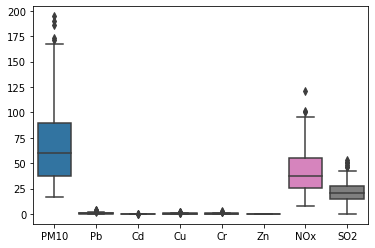

In [6]:
sns.boxplot(data=new)

# Winsorizing Technique -- Treatment of Outlier# 

In [7]:
q1 = new['PM10'].quantile(0.25)
q3 = new['PM10'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

169.0425

In [8]:
new['PM10']=np.where(new['PM10'] > upper_limit,upper_limit,new['PM10']) # upper limit

<AxesSubplot:>

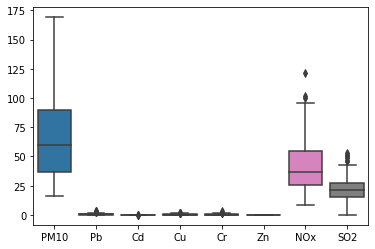

In [9]:
sns.boxplot(data=new)

In [10]:
new['Pb']=np.where(new['Pb'] > upper_limit,upper_limit,new['Pb']) # upper limit

<AxesSubplot:>

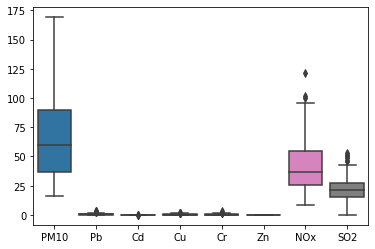

In [11]:
sns.boxplot(data=new)

In [12]:
q1 = new['Pb'].quantile(0.25)
q3 = new['Pb'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

2.0825

<AxesSubplot:>

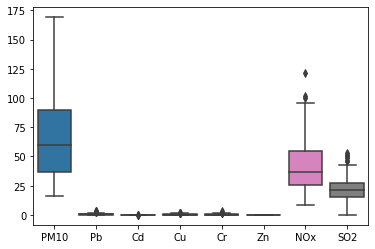

In [13]:
sns.boxplot(data=new)

In [14]:
q1 = new['Cd'].quantile(0.25)
q3 = new['Cd'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

0.0

In [15]:
new['Cd']=np.where(new['Cd'] > upper_limit,upper_limit,new['Cd']) # upper limit

<AxesSubplot:>

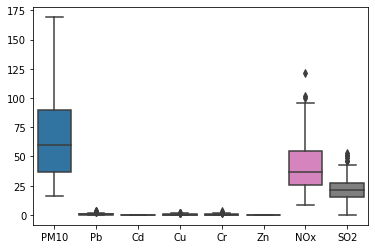

In [16]:
sns.boxplot(data=new)

In [17]:
q1 = new['Cu'].quantile(0.25)
q3 = new['Cu'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

1.2775

In [18]:
new['Cu']=np.where(new['Cu'] > upper_limit,upper_limit,new['Cu']) # upper limit

<AxesSubplot:>

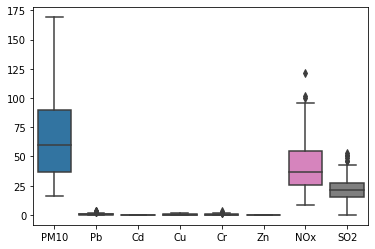

In [19]:
sns.boxplot(data=new)

In [20]:
q1 = new['Cr'].quantile(0.25)
q3 = new['Cr'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

1.3224999999999998

In [21]:
new['Cr']=np.where(new['Cr'] > upper_limit,upper_limit,new['Cr']) # upper limit

<AxesSubplot:>

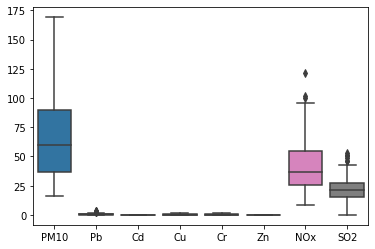

In [22]:
sns.boxplot(data=new)

In [23]:
q1 = new['Zn'].quantile(0.25)
q3 = new['Zn'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

0.0

In [24]:
new['Zn']=np.where(new['Zn'] > upper_limit,upper_limit,new['Zn']) # upper limit

<AxesSubplot:>

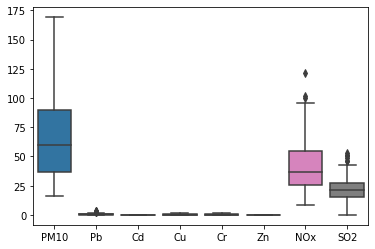

In [25]:
sns.boxplot(data=new)

In [26]:
q1 = new['NOx'].quantile(0.25)
q3 = new['NOx'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

98.13499999999999

In [27]:
new['NOx']=np.where(new['NOx'] > upper_limit,upper_limit,new['NOx']) # upper limit

<AxesSubplot:>

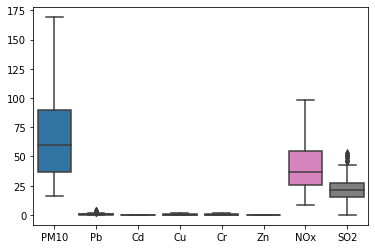

In [28]:
sns.boxplot(data=new)

In [29]:
q1 = new['SO2'].quantile(0.25)
q3 = new['SO2'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

45.80250000000001

In [30]:
new['SO2']=np.where(new['SO2'] > upper_limit,upper_limit,new['SO2']) # upper limit

<AxesSubplot:>

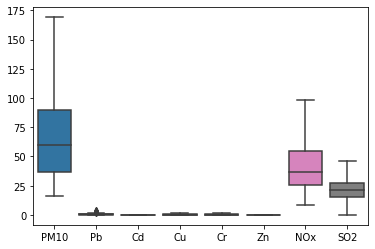

In [31]:
sns.boxplot(data=new)

In [32]:
df.describe()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.0,151.000000,151.000000
mean,68.536026,0.716358,0.000265,0.331854,0.390066,0.0,42.692914,22.359868
std,40.908548,0.673069,0.001982,0.408259,0.434575,0.0,23.101723,10.393498
min,16.240000,0.000000,0.000000,0.000000,0.000000,0.0,8.260000,0.000000
25%,37.005000,0.220000,0.000000,0.040000,0.085000,0.0,25.735000,15.165000
50%,59.610000,0.570000,0.000000,0.130000,0.230000,0.0,37.000000,20.930000
75%,89.820000,0.965000,0.000000,0.535000,0.580000,0.0,54.695000,27.420000
max,194.740000,3.490000,0.020000,1.650000,3.220000,0.0,121.460000,53.270000


In [33]:
new.isna().sum()  # no missing data

PM10      0
Pb        0
Cd        0
Cu        0
Cr        0
Zn        0
NOx       0
SO2       0
Site      0
Date      0
Season    0
dtype: int64

#  Step 3 : Splitting the data in Training and Test set
* Using sklearn we split 70% of our data into training set and rest in test set.
* Setting random_state will give the same training and test set everytime on running the code

In [34]:
new.head()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2,Site,Date,Season
0,120.71,2.67,0.0,0.53,0.6100,0.0,84.17,40.3700,Mandai,2004-02-07,Summer
1,140.25,3.49,0.0,0.10,0.9100,0.0,88.81,39.4800,Mandai,2004-02-14,Summer
2,107.01,1.31,0.0,0.19,0.4800,0.0,81.49,45.8025,Mandai,2004-02-21,Summer
3,88.81,0.76,0.0,0.33,0.3900,0.0,61.80,27.4200,Mandai,2004-02-28,Summer
4,75.05,0.60,0.0,0.41,1.3225,0.0,48.71,19.2300,Mandai,2004-03-06,Summer


In [35]:
new=new.drop(['Cd','Zn','Site','Date','Season'],axis = 1)

In [36]:
# Putting feature variable to X
X = new.drop(['PM10'], axis= 1)

# Putting response variable to y
y = new[['PM10']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=120)

In [37]:
df = pd.concat([y_train, X_train], axis=1)
df.head()

,PM10,Pb,Cu,Cr,NOx,SO2
125,26.19,0.00,0.16,0.04,22.14,10.93
48,40.92,0.39,0.08,0.21,26.00,13.66
149,52.10,0.48,0.04,0.06,42.08,22.95
55,90.48,0.72,0.00,0.02,39.16,15.72
63,141.11,1.39,0.53,0.71,80.72,34.31


# Correlation Matrix

In [38]:
df.corr()

,PM10,Pb,Cu,Cr,NOx,SO2
PM10,1.000000,0.829414,0.696160,0.841537,0.551074,0.519019
Pb,0.829414,1.000000,0.590017,0.716816,0.629604,0.584272
Cu,0.696160,0.590017,1.000000,0.759803,0.444826,0.433378
Cr,0.841537,0.716816,0.759803,1.000000,0.475384,0.438371
NOx,0.551074,0.629604,0.444826,0.475384,1.000000,0.860182
SO2,0.519019,0.584272,0.433378,0.438371,0.860182,1.000000


<AxesSubplot:>

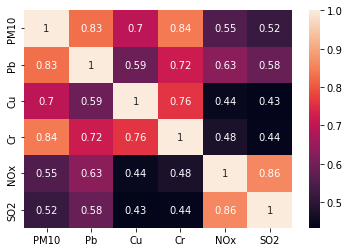

In [39]:
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:title={'center':'PM10 vs Pb'}, xlabel='Pb', ylabel='PM10'>

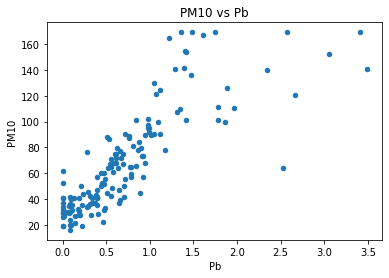

In [40]:
new.plot.scatter(x='Pb', y='PM10', title='PM10 vs Pb')

# Pb have 82%  strong positve correlation with PM10

* Pb have high impact on PM10
* There is no colinearity in data, So every platform is independent 

# Multicolinearity (with the help of VIF)

In [ ]:
X1=df.drop(['PM10','NOx','Zn',],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

# Model Building

 *  H0 :- There is no Linear relationship  between PM10 and Pb 

* Vs 

*  H1 :- There is Linear relationship between PM10 and Pb 

Alpha = 0.05 (5%)

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols('PM10  ~ PM10 + Pb + Cd + Cu +  Cr + SO2',data=new).fit()
model.summary()

In [ ]:
# removing the insignificant variable 
model2=smf.ols('PM10 ~ Pb+SO2',data=new).fit()
model2.summary()

* There is Linear relationship between PM10 and Pb , Cd
* 73% is accuracy of model , so we say model is good fit 
* Y = 27.2579 + 1.000 * Pb + (-4164.0672) * Cd

# Assumption of Model

* Linearity
* Normality
* Homoscedasicity
* Model Error has to be independently identificaly Distibuted

In [ ]:
new.head()

In [ ]:
# Y = intercet + b1 * Pb + b2 * Cd
Y = 27.2579 + 1.0000 *3.49 + (-4164.0672) * 0.02
Y

In [ ]:
new['fitted_value']=model2.fittedvalues #Predicted Value
new['residual']=model2.resid  #Error
new.head()

# Linearity

In [ ]:
df.plot.scatter(x='Pb', y='PM10', title='PM10 vs Pb')

# Homoscedasicity

In [ ]:
new['NOx']=np.where(new['NOx'] > upper_limit,upper_limit,new['NOx']) # upper limit

In [ ]:
sns.scatterplot(x='fitted_value', y='residual',data=new)

# Normality

In [ ]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

# Model Error are IID 

In [ ]:
new['residual'].plot.hist()

# Prediction on Test Data (unseen data)

In [ ]:
df_test=pd.concat([X_test,y_test],axis=1)

df_test.head()

In [ ]:
df_test['Prediction']=model2.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

In [ ]:
# Y = intercet + b1 * Pb + b2 * Cd
Y = 27.2579 + 1.0000 *0.00 + (-4164.0672) * 0.0
Y

# Test

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(df_test.PM10 , df_test.Prediction)
print('R2 score for model Performance on Test', np.round(r2,2))

# Train

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(df.PM10, df.fitted_value)
print('R2 score for model Performance on Test', np.round(r2,2))

 * Model is good fit & Performance on Test data is also good fit 

## 